In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.shape

(400, 5)

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
import seaborn as sns

In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
import matplotlib.pyplot as plt

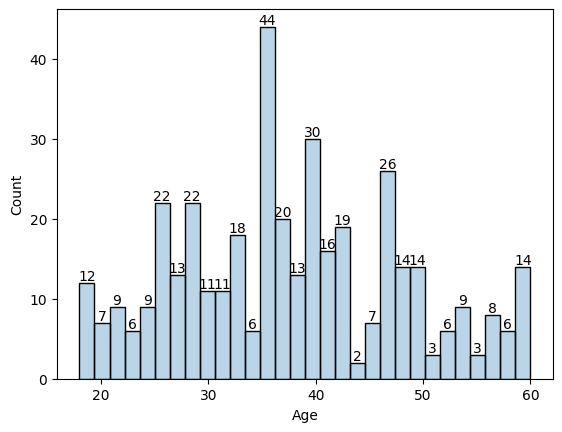

In [9]:
histplot = sns.histplot(df['Age'], bins=30, alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

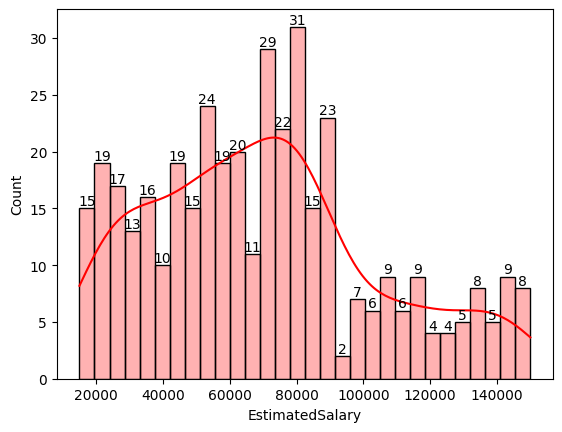

In [10]:
histplot = sns.histplot(df['EstimatedSalary'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i)
plt.show()

In [11]:
df["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [12]:
def gender_encoder(value):
    if (value == "Male"):
        return 1
    elif (value == "Female"):
        return 0
    else:
        return -1

In [13]:
df["Gender"] = df["Gender"].apply(gender_encoder)

In [14]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

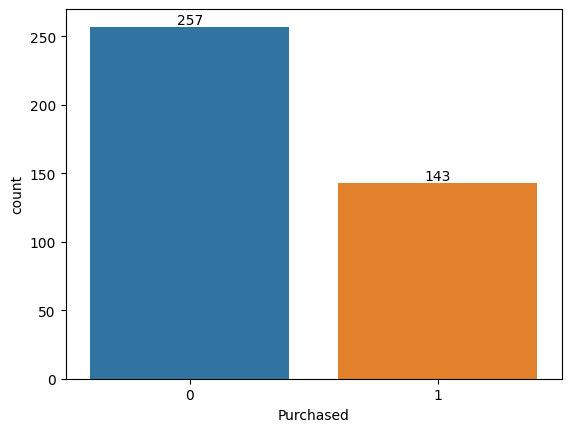

In [15]:
countplot = sns.countplot(x=df["Purchased"])
for i in countplot.containers:
    countplot.bar_label(i)
plt.show()

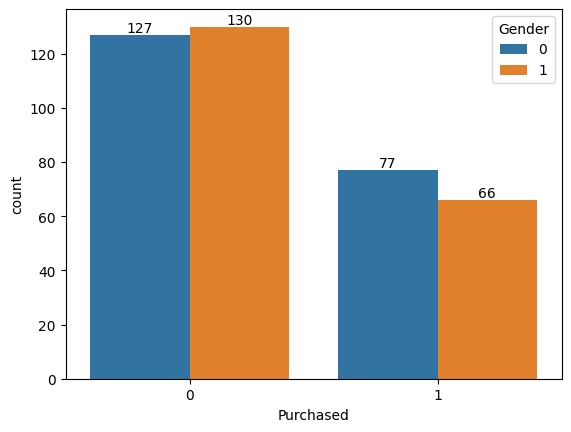

In [16]:
countplot = sns.countplot(x=df["Purchased"], hue=df["Gender"])
for i in countplot.containers:
    countplot.bar_label(i,)
plt.show()

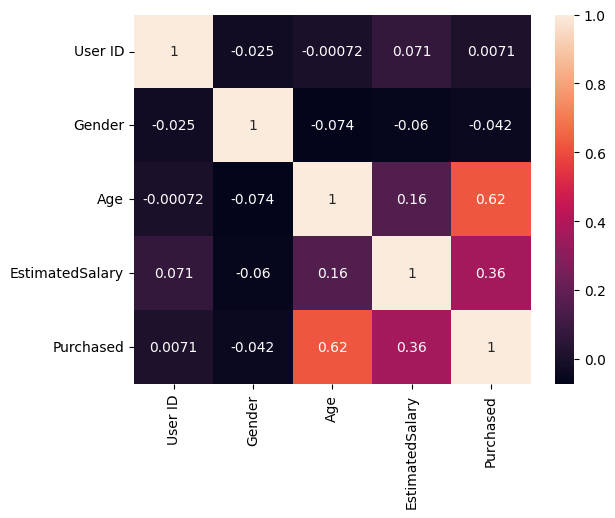

In [17]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# DataPreparation

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [19]:
x = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

In [20]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

# Model Building

In [23]:
model = LogisticRegression(n_jobs=-1)

In [24]:
model.fit(x_train, y_train)

LogisticRegression(n_jobs=-1)

In [25]:
y_pred = model.predict(x_test)

# Evaluation

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  2]
 [ 9 19]]


In [27]:
# Extract TP, FP, TN, FN from the confusion matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

In [35]:
# print(f"TN value is {cm[0][0]}")
# print(f"FP value is {cm[0][1]}")
# print(f"FN value is {cm[1][0]}")
# print(f"TP value is {cm[1][1]}")

print(f"TN value is ",TN)
print(f"FP value is ",FP)
print(f"FN value is ",FN)
print(f"TP value is ",TP)

TN value is  50
FP value is  2
FN value is  9
TP value is  19


In [29]:
# print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")

# Compute accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)


Accuracy: 0.8625


In [30]:
# print(f"Error rate is {1-accuracy_score(y_test, y_pred)}")

# Compute error rate
error_rate = (FP + FN) / (TP + TN + FP + FN)
print("Error Rate:", error_rate)

Error Rate: 0.1375


In [31]:
# print(f"Precision score is {precision_score(y_test, y_pred)}")

# Compute precision
precision = TP / (TP + FP)
print("Precision:", precision)

Precision: 0.9047619047619048


In [32]:
# print(f"Recall score is {recall_score(y_test, y_pred)}")

# Compute recall (or sensitivity)
recall = TP / (TP + FN)
print("Recall:", recall)

Recall: 0.6785714285714286


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

